# Programming Assignment 2
Diogo Benetti Faé Rodrigues<br/>
Algorithm Engineering<br/>
03/22/2022

## Part 1 - Undirected Complete Graphs


In [28]:
# .venv\scripts\activate
import matplotlib.pyplot as plt
import networkx as nx
import time
import pandas as pd

# Adjacency List Example - 2D List
r, c = (5, 5)

adj = [[0 for i in range(c)] for j in range(r)]

for i in adj:
  print(i)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


In [2]:
def complete(v):
  # Create Adjacency List
  adj = [[0 for i in range(v)] for j in range(v)]

  # Fill in vertices at the first column in all rows
  for index in range(v):
    adj[index][0] = index + 1
  
  index = 0
  found = False

  for r in range(len(adj)):
    found = False
    for c in range(len(adj[r])):
        # Skip over first column
        if c == 0:
          index = adj[r][c]
          # print(index) # CORRECT
        
        # Iterate V-1 times, fill other spots with all values except index
        else:          
          # Check if the current edge is the same as the vertex
          if c == index:
            found = True

          # If it has found the vertex, then just skip it and all next values
          # will be + 1
          if found:
            adj[r][c] = c + 1
          else:
            adj[r][c] = c

  return adj

## Part 2 - Cycles

In [5]:
def cycle(v):
  adj = [[0 for i in range(3)] for j in range(v)]

  for index in range(v):
    adj[index][0] = index + 1
  
  for r in range(len(adj)):
    # Each vertex only has 2 edges in a cycle
    # These edges are either + or - 1 in relation to the value of the vertex
    adj[r][1] = adj[r][0] - 1
    adj[r][2] = adj[r][0] + 1

    # Check if the value is not 0 or over the number of vertices
    if adj[r][1] == 0:
      adj[r][1] = v
    
    if adj[r][2] == v+1:
      adj[r][2] = 1
  
  return adj

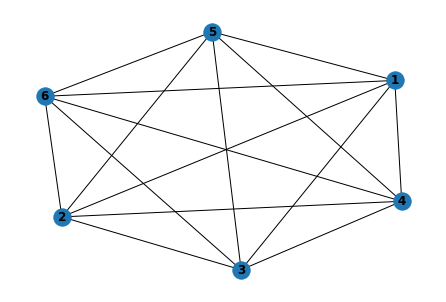

In [18]:
c = complete(6)
print_graph(c)

## Printing Function

In [8]:
# https://networkx.org/documentation/stable/tutorial.html

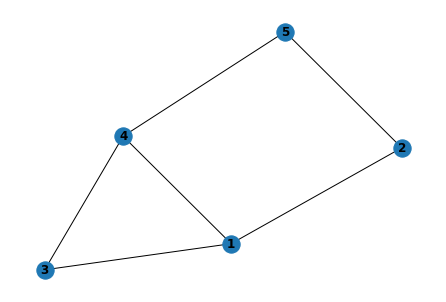

In [24]:
def print_graph(adj):
    G = nx.Graph()
    
    # Get total number of vertices
    v_num = len(adj)
    
    # Add Vertices to graph
    G.add_nodes_from(range(1, v_num+1))
    
    # Add edges (from adjacency list) to graph
    for v in range(len(adj)):
        for e in range(len(adj[v])):
            if e != 0:
                G.add_edge(adj[v][0], adj[v][e])
                # G.add_edge(adj[v][0], adj[v][e], color='r')
    
    # Print the graph
    nx.draw(G, with_labels=True, font_weight='bold')

print_graph(handOut)

In [9]:
import numpy as np

def printGraph(adj):
  print(adj)
  print()
      
  # Print Number of Vertices
  print(len(adj))

  # Print Starting Locations of Vertices' Edges
  prevLoc = len(adj) + 1
  print(prevLoc)

  for v in range(len(adj)):
    if v != 0:
      prevLoc = prevLoc + np.count_nonzero(adj[v-1]) - 1
      print(prevLoc)


  # Print All Edges
  for v in range(len(adj)):
    for e in range(len(adj[v])):
      if e != 0:
        print(adj[v][e])

handOut = [[1,2,3,4],[2,1,5],[3,1,4],[4,1,3,5],[5,2,4]]

printGraph(handOut)

[[1, 2, 3, 4], [2, 1, 5], [3, 1, 4], [4, 1, 3, 5], [5, 2, 4]]

5
6
9
11
13
16
2
3
4
1
5
1
4
1
3
5
2
4


## Runs

In [29]:
start = time.time()
complete(1000)
end = time.time()
ten = end - start

start = time.time()
complete(2000)
end = time.time()
twenty = end - start

start = time.time()
complete(3000)
end = time.time()
thirty = end - start

start = time.time()
complete(4000)
end = time.time()
forty = end - start

start = time.time()
complete(5000)
end = time.time()
fifty = end - start

start = time.time()
cycle(1000)
end = time.time()
tenCy = end - start

start = time.time()
cycle(2000)
end = time.time()
twentyCy = end - start

start = time.time()
cycle(3000)
end = time.time()
thirtyCy = end - start

start = time.time()
cycle(4000)
end = time.time()
fortyCy = end - start

start = time.time()
cycle(5000)
end = time.time()
fiftyCy = end - start

## Analysis


### Asymptotic Running Time
- The asymptotic running time for the Complete Graph function is O(n^2), while the upper bound for the Cycle function is O(n)

### Table with Running Times for Various Values

In [30]:
table = pd.DataFrame({
   'Complete': [ten, twenty, thirty, forty, fifty],
   'Cycle': [tenCy, twentyCy, thirtyCy, fortyCy, fiftyCy]
   }, index=[1000, 2000, 3000, 4000, 5000])

table.head()

,Complete,Cycle
1000,0.176480,0.000000
2000,0.675925,0.000000
3000,1.649381,0.008009
4000,2.578861,0.000000
5000,3.235741,0.008000


### Graph of Running Times vs Various Values

<AxesSubplot:>

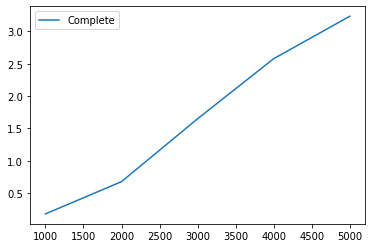

In [31]:
# Complete Graphs
completeTable = table.iloc[: , :1]
completeTable.plot()

<AxesSubplot:>

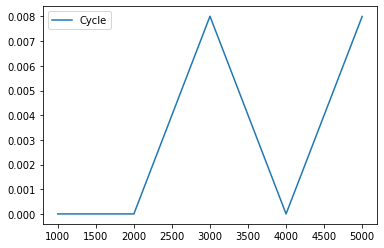

In [33]:
# Cycle Graphs
cycleTable = table.iloc[: , 1:]
cycleTable.plot()

### Running Times and Analysis
The graphs support my claims regarding the time complexities of both algorithms.
<br>
The times for the Complete Graph algorithm clearly increase in a quadratic form, up to 4,000 items. At 5,000 items, the time was smaller than the one at 4,000 items, but that is most likely due to the machine using more/less computing power with other applications.<br/>
The times for the Cycle Graph algorithm increase almost perfectly linearly as the graph shows.